In [2]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats

In [3]:
data_dir1 = "C:/Users/Savitha Srinivasan/UCSD assn/ECE 143/ECE-143-Project---Joke-recommendation-system/Dataset Version 1/jester-data-1.xls"
data_dir2 = "C:/Users/Savitha Srinivasan/UCSD assn/ECE 143/ECE-143-Project---Joke-recommendation-system/Dataset Version 1/jester-data-2.xls"
data_dir3 = "C:/Users/Savitha Srinivasan/UCSD assn/ECE 143/ECE-143-Project---Joke-recommendation-system/Dataset Version 1/jester-data-3.xls"
df1 = pd.read_excel(data_dir1, header=None)
df2 = pd.read_excel(data_dir2, header=None)
df3 = pd.read_excel(data_dir3, header=None)
df = df1.append(df2).append(df3)
# df = pd.DataFrame(pd.read_excel(data_dir))

In [4]:
df.index = range(df.shape[0])
df.index.name = "User ID"
col_names = ["joke"+str(i) for i in range(1, df.shape[1])]
df.columns = ["NumRated"] + col_names
df[df==99.0] = np.nan
df = df.loc[:, df.columns != "NumRated"]
df.head(6)

,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
User ID,,,,,,,,,,,,,,,,,,,,,
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [40]:
#normalization
def normalize_data(dataframe): 
    mean_data = dataframe.sum(axis=1, numeric_only=True)/dataframe.count(1)
    print(mean_data[2])
    return dataframe.subtract(mean_data, axis='rows')
normalized_df = normalize_data(df)
normalized_df.head(6)

7.099387755102041


,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
User ID,,,,,,,,,,,,,,,,,,,,,
0,-4.388108,12.221892,-6.228108,-4.728108,-4.088108,-5.068108,-6.418108,7.601892,-5.548108,-1.328108,...,6.251892,NaN,NaN,NaN,NaN,NaN,-2.198108,NaN,NaN,NaN
1,1.333700,-3.036300,3.613700,1.623700,-5.126300,-12.406300,-3.476300,-8.086300,6.133700,6.473700,...,0.073700,-7.696300,-3.036300,5.113700,-2.936300,-4.886300,0.313700,-2.406300,-7.066300,-1.676300
2,NaN,NaN,NaN,NaN,1.930612,2.170612,1.930612,2.170612,NaN,NaN,...,NaN,NaN,NaN,1.980612,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.691875,NaN,NaN,-0.858125,5.501875,-5.478125,3.551875,NaN,-0.818125,...,NaN,NaN,NaN,-2.128125,NaN,NaN,NaN,NaN,NaN,NaN
4,5.247363,1.357363,-7.422637,-8.642637,-1.892637,-1.652637,3.787363,1.357363,-3.692637,2.477363,...,1.937363,2.327363,1.017363,1.937363,2.477363,-1.702637,-0.142637,3.297363,-1.452637,-1.652637
5,-1.272300,1.357700,5.337700,-3.602300,-2.192300,0.577700,-3.792300,4.027700,-1.752300,3.097700,...,1.357700,-1.992300,4.217700,1.937700,2.717700,1.547700,4.947700,-4.182300,-0.152300,1.447700


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Mean rating per user')]

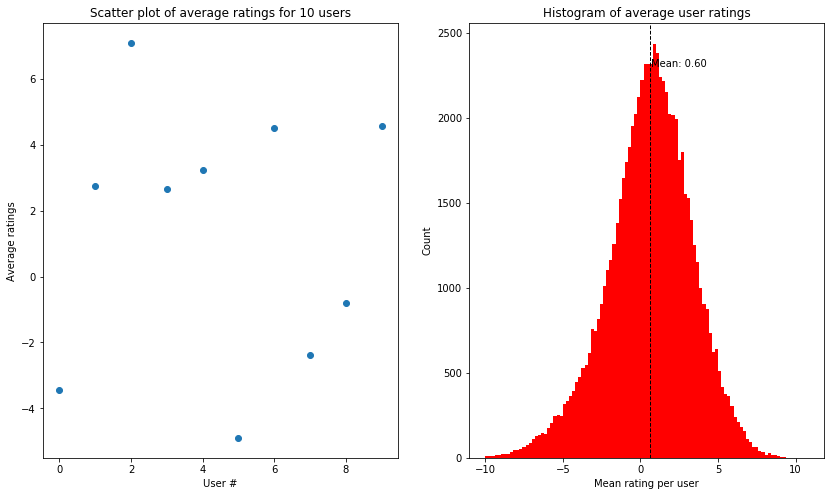

In [93]:
avg_joke_rating = np.nanmean(df,axis=0)
each_user_avg = np.nanmean(df,axis=1)
fig=plt.figure(figsize=(14,8)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.hist(each_user_avg, np.arange(-10,11,0.2), color = "red")
ax1.scatter(np.arange(0,10),each_user_avg[:10])
ax1.set_title('Scatter plot of average ratings for 10 users')
ax1.set(xlabel='User #', ylabel='Average ratings')
ax2.set_title('Histogram of average user ratings')
ax2.axvline(each_user_avg.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax2.text(each_user_avg.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(each_user_avg.mean()))
ax2.set(xlabel='Mean rating per user', ylabel='Count')

In [29]:
#similarity computation
import scipy
def pearson(new_user, dataframe): 
    d1 = np.nansum(np.square(new_user)) 
    d2 = np.nansum(np.square(dataframe),axis=1)
    sim = np.nan_to_num(np.nansum(dataframe*new_user, axis=1)/np.sqrt(d1*d2))
    most_similar = np.sort(sim)[-20:]
    most_similar_idx = np.argsort(sim)[-20:]
    return (most_similar, most_similar_idx)

def cosine_similarity(new_user,dataframe): 
    numerator = np.nansum(dataframe * new_user, axis=1)
    norm_user = np.sqrt(np.nansum(np.power(new_user, 2)))
    norm_df = np.sqrt(np.nansum(np.power(dataframe, 2), axis=1))
    sim = numerator / (norm_user * norm_df)
    sim = np.nan_to_num(sim)
    most_similar = np.sort(sim)[-20:]
    most_similar_idx = np.argsort(sim)[-20:]
    return (most_similar, most_similar_idx)

def get_top_smilar_jokes(most_similar, top_user_matrix): 
    scores_matrix = top_user_matrix.copy() 
    top_jokes = np.nansum(top_user_matrix.T * most_similar, axis=1)/np.sum(most_similar)
    top_5 = np.argsort(top_jokes)[-5:]
    return top_5 



In [51]:
# gauge_set = [7, 8, 13, 15, 16, 17, 18, 19] #using PCA 
gauge_set = list(range(100))
new_user = normalized_df.iloc[46].copy() 
new_user[:] = np.nan
new_user.iloc[gauge_set] = normalized_df.iloc[132,gauge_set]
most_similar, most_similar_idx = pearson(new_user,normalized_df)
top_user_matrix = normalized_df.iloc[most_similar_idx].copy()
top_5 = get_top_smilar_jokes(most_similar, top_user_matrix)
print("Top 5 recommended jokes:", top_5)
print("Actual rankings given by the user:\n{}".format(df.iloc[132, list(top_5)]))

Top 5 recommended jokes: [70 87 83 49 31]
Actual rankings given by the user:
joke71    8.64
joke88    9.13
joke84    8.69
joke50    7.86
joke32    8.69
Name: 132, dtype: float64
